In [1]:
from __future__ import annotations
from typing import Final as const
import numpy as np
from numpy import ndarray
from matplotlib import pyplot as plt

In [32]:
class Bandit:
    
    def __init__(self, arms: int= 10):
        """
        Args:
            arms: int スロットマシンの数
        """
        self.rates = np.random.rand(arms)

    def play(self, slot_no: int):
        """
        指定したスロットマシンを1回回す
        Args:
            arms: int スロットマシンの番号
        Returns:
            int 報酬
        """
        rate: float = self.rates[slot_no]
        play_result = np.random.rand()
        reward = 1 if rate > play_result else 0
        return reward


class NonStatBandit:
    
    def __init__(self, arms: int= 10):
        """
        Args:
            arms: int スロットマシンの数
        """
        self.arms = arms #追加
        self.rates = np.random.rand(arms)

    def play(self, slot_no: int):
        """
        指定したスロットマシンを1回回す
        Args:
            arms: int スロットマシンの番号
        Returns:
            int 報酬
        """
        rate: float = self.rates[slot_no]
        self.rates += np.random.randn(self.arms) * 0.1 #ノイズの追加
        
        play_result = np.random.rand()
        reward = 1 if rate > play_result else 0
        return reward


class Agent:

    def __init__(self, epsilon: float, action_size: int):
        """
        Args:
            epsilon: float ε-greedy法のε
            action_size: int 行動数
        """
        self.epsilon = epsilon
        self.Qs: ndarray = np.zeros(action_size) #マシンごとの推定価値
        self.play_counts = np.zeros(action_size) #各マシンのプレイ回数

    def update(self, action: int , reward: int):
        """
        推定価値の更新
        Args:
            action: int 選択したスロットマシンの番号
            reward: int 報酬
        """
        self.play_counts[action] += 1
        self.Qs[action] = self.Qs[action] + (reward - self.Qs[action]) / self.play_counts[action]

    def get_action(self):
        """
        ε-greedy法に基づいて行動を選択
        Returns:
            int 選択したスロットマシンの番号
        """
        action: int
        if np.random.rand() < self.epsilon:
            action = np.random.randint(0, len(self.Qs))
        else:
            action = np.argmax(self.Qs)
        return action

In [35]:
non_stat_bandit = NonStatBandit(1)
for i in range(10):
    non_stat_bandit.play(0)
    print(f"{i}回目 : rates: {non_stat_bandit.rates}")

print("====")

bandit = Bandit(1)
for i in range(10):
    bandit.play(0)
    print(f"{i}回目 : rates: {bandit.rates}")
        

0回目 : rates: [0.77078981]
1回目 : rates: [0.6695398]
2回目 : rates: [0.52034065]
3回目 : rates: [0.61373274]
4回目 : rates: [0.69429458]
5回目 : rates: [0.56862192]
6回目 : rates: [0.532476]
7回目 : rates: [0.44254571]
8回目 : rates: [0.40272429]
9回目 : rates: [0.46934659]
====
0回目 : rates: [0.84034819]
1回目 : rates: [0.84034819]
2回目 : rates: [0.84034819]
3回目 : rates: [0.84034819]
4回目 : rates: [0.84034819]
5回目 : rates: [0.84034819]
6回目 : rates: [0.84034819]
7回目 : rates: [0.84034819]
8回目 : rates: [0.84034819]
9回目 : rates: [0.84034819]


In [3]:
def play(steps: int, eps: float, slot_count: int) -> tuple[ndarray, ndarray]:
    bandit = Bandit(slot_count)
    agent = Agent(eps, slot_count)
    total_reward = 0
    total_rewards = []
    rates = []

    for step in range(steps):
        #行動選択 -> 実行
        action = agent.get_action()
        reward = bandit.play(action)

        # 報酬に基づいく推定価値の更新
        agent.update(action, reward)
        total_reward += reward

        total_rewards.append(total_reward)
        rates.append(total_reward / (step + 1))

    print(f"Settings : Step:{steps}, ε:{eps}, Slot Count:{slot_count}")
    print(f"TOTAL REWARD: {total_reward}")

    return (total_rewards, rates)

Settings : Step:1000, ε:0.1, Slot Count:10
TOTAL REWARD: 912
Settings : Step:1000, ε:0.1, Slot Count:10
TOTAL REWARD: 845
Settings : Step:1000, ε:0.1, Slot Count:10
TOTAL REWARD: 622
Settings : Step:1000, ε:0.1, Slot Count:10
TOTAL REWARD: 906
Settings : Step:1000, ε:0.1, Slot Count:10
TOTAL REWARD: 905
Settings : Step:1000, ε:0.1, Slot Count:10
TOTAL REWARD: 767
Settings : Step:1000, ε:0.1, Slot Count:10
TOTAL REWARD: 822
Settings : Step:1000, ε:0.1, Slot Count:10
TOTAL REWARD: 868
Settings : Step:1000, ε:0.1, Slot Count:10
TOTAL REWARD: 743
Settings : Step:1000, ε:0.1, Slot Count:10
TOTAL REWARD: 437


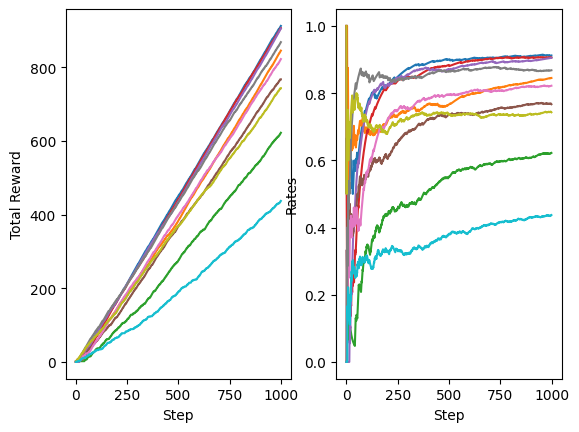

In [21]:
# 10セット実行した結果
for _ in range(10):
    total_rewards, rates = play(1000, 0.1, 10)
    
    # subplotで２つのグラフを描画
    plt.subplot(1, 2, 1,)
    plt.plot(total_rewards)
    plt.xlabel("Step")
    plt.ylabel("Total Reward")

    plt.subplot(1, 2, 2,)
    plt.plot(rates)
    plt.xlabel("Step")
    plt.ylabel("Rates")    

plt.show()
    

Settings : Step:1000, ε:0.1, Slot Count:10
TOTAL REWARD: 921
Settings : Step:1000, ε:0.1, Slot Count:10
TOTAL REWARD: 906
Settings : Step:1000, ε:0.1, Slot Count:10
TOTAL REWARD: 818
Settings : Step:1000, ε:0.1, Slot Count:10
TOTAL REWARD: 780
Settings : Step:1000, ε:0.1, Slot Count:10
TOTAL REWARD: 705
Settings : Step:1000, ε:0.1, Slot Count:10
TOTAL REWARD: 865
Settings : Step:1000, ε:0.1, Slot Count:10
TOTAL REWARD: 793
Settings : Step:1000, ε:0.1, Slot Count:10
TOTAL REWARD: 873
Settings : Step:1000, ε:0.1, Slot Count:10
TOTAL REWARD: 718
Settings : Step:1000, ε:0.1, Slot Count:10
TOTAL REWARD: 778
Settings : Step:1000, ε:0.1, Slot Count:10
TOTAL REWARD: 918
Settings : Step:1000, ε:0.1, Slot Count:10
TOTAL REWARD: 811
Settings : Step:1000, ε:0.1, Slot Count:10
TOTAL REWARD: 736
Settings : Step:1000, ε:0.1, Slot Count:10
TOTAL REWARD: 931
Settings : Step:1000, ε:0.1, Slot Count:10
TOTAL REWARD: 911
Settings : Step:1000, ε:0.1, Slot Count:10
TOTAL REWARD: 848
Settings : Step:1000, ε:

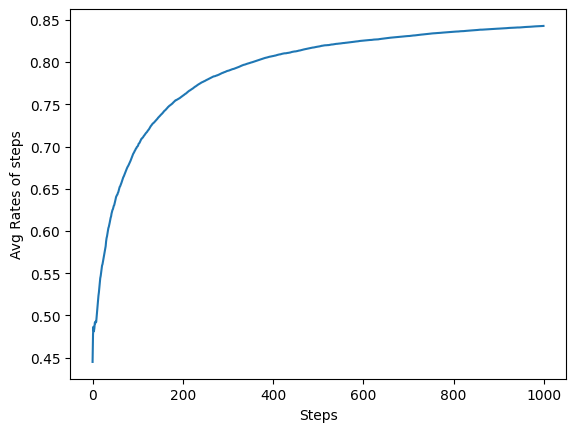

In [23]:
runs = 200
steps = 1000
all_rates = np.zeros((runs, steps))

for i in range(runs):
    total_rewards, rates = play(steps, 0.1, 10)
    all_rates[i] = rates

avg_rates = np.average(all_rates, axis=0)

plt.ylabel('Avg Rates of steps')
plt.xlabel('Steps')
plt.plot(avg_rates)
plt.show()
    

Settings : Step:1000, ε:0.001, Slot Count:10
TOTAL REWARD: 396
Settings : Step:1000, ε:0.001, Slot Count:10
TOTAL REWARD: 897
Settings : Step:1000, ε:0.001, Slot Count:10
TOTAL REWARD: 749
Settings : Step:1000, ε:0.001, Slot Count:10
TOTAL REWARD: 143
Settings : Step:1000, ε:0.001, Slot Count:10
TOTAL REWARD: 817
Settings : Step:1000, ε:0.001, Slot Count:10
TOTAL REWARD: 637
Settings : Step:1000, ε:0.001, Slot Count:10
TOTAL REWARD: 839
Settings : Step:1000, ε:0.001, Slot Count:10
TOTAL REWARD: 228
Settings : Step:1000, ε:0.001, Slot Count:10
TOTAL REWARD: 950
Settings : Step:1000, ε:0.001, Slot Count:10
TOTAL REWARD: 899
Settings : Step:1000, ε:0.001, Slot Count:10
TOTAL REWARD: 425
Settings : Step:1000, ε:0.001, Slot Count:10
TOTAL REWARD: 741
Settings : Step:1000, ε:0.001, Slot Count:10
TOTAL REWARD: 611
Settings : Step:1000, ε:0.001, Slot Count:10
TOTAL REWARD: 584
Settings : Step:1000, ε:0.001, Slot Count:10
TOTAL REWARD: 322
Settings : Step:1000, ε:0.001, Slot Count:10
TOTAL REWA

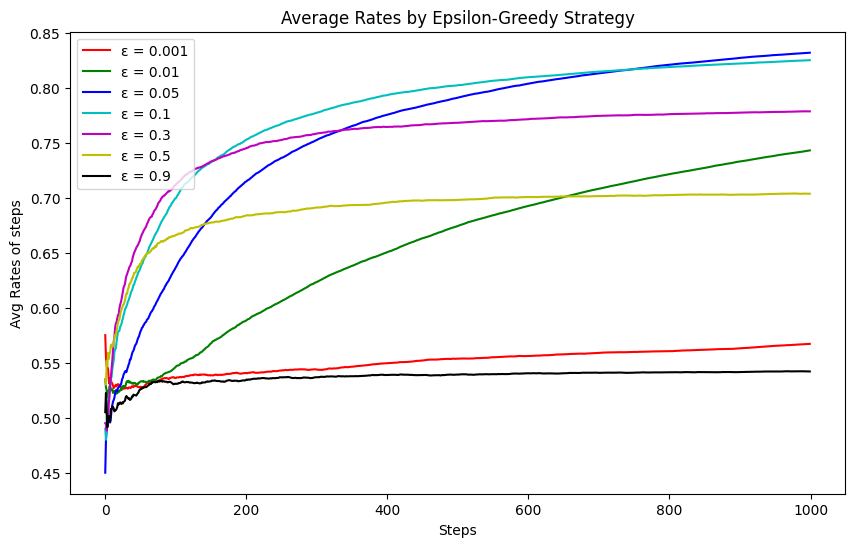

In [30]:
# パラメータの設定
runs = 200
steps = 1000
epsilon_values = [0.001, 0.01, 0.05, 0.1, 0.3, 0.5, 0.9]

colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k']
all_rates = {eps: np.zeros((runs, steps)) for eps in epsilon_values}

# 各εに対して実験を実行
for epsilon in epsilon_values:
    for i in range(runs):
        _, rates = play(steps, epsilon, 10)
        all_rates[epsilon][i] = rates

# 平均値の計算とプロット
plt.figure(figsize=(10, 6))
for epsilon, color in zip(epsilon_values, colors):
    avg_rates = np.average(all_rates[epsilon], axis=0)
    plt.plot(avg_rates, color=color, label=f'ε = {epsilon}')

plt.ylabel('Avg Rates of steps')
plt.xlabel('Steps')
plt.title('Average Rates by Epsilon-Greedy Strategy')
plt.legend()
plt.show()